#그레인저 인과관계 모형(granger casuality model)

##의미 <br>
X라는 사건과 Y라는 사건이 서로 인과관계에 있는 지 확인하는 모형. <br>
어떤 현상의 예측에 있어서 다른 정보를 이용하는 것이 얼마나 유의미한지 나타내는 척도

##수행순서
 - 사건 X와 Y를 설정한다.
 - X -> Y일때의 가설검정을 수행한다.
 - Y -> X일때의 가설검정을 수행한다.
 

##가설 검정
가설 검정은 A/B 가설검정과 같음(귀무가설 대립가설) 

##결과 해석
한방향으로만 유의미하면 인과관계가 성립힌다.

In [12]:
import pandas as pd

df_corona = pd.read_csv('/content/sample_data/서울시 코로나19 확진자 발생동향.csv', encoding = 'euc-kr')
df_trading_20 = pd.read_excel('/content/sample_data/월간무역동향(202001_202012).xlsx')
df_trading_21 = pd.read_excel('/content/sample_data/월간무역동향(202101_202112).xlsx')
df_trading_22 = pd.read_excel('/content/sample_data/월간무역동향(202201_202207).xlsx')

In [20]:
temp = []
for i in range(len(df_trading_20.columns)):
  temp.append(df_trading_20.columns[i].replace('<br>',' ').replace('\n',' '))
df_trading_20.columns = temp

In [21]:
temp = []
for i in range(len(df_trading_21.columns)):
  temp.append(df_trading_21.columns[i].replace('<br>',' ').replace('\n',' '))
df_trading_21.columns = temp

In [22]:
temp = []
for i in range(len(df_trading_22.columns)):
  temp.append(df_trading_22.columns[i].replace('<br>',' ').replace('\n',' '))
df_trading_22.columns = temp

In [23]:
date_2020 = []
for i in range(1,13):
  date_2020.append('2020.'+str(i).zfill(2))
date_2021 = []
for i in range(1,13):
  date_2021.append('2021.'+str(i).zfill(2))
date_2022 = []
for i in range(1,8):
  date_2022.append('2022.'+str(i).zfill(2))

In [24]:
export_2020 = [] 
for i in range(1,13):
  date = '수출금액 (불) (2020'+str(i).zfill(2)+')'
  export_2020.append(int(df_trading_20[date].iloc[0].replace(',',''))/10000000)
export_2021 = [] 
for i in range(1,13):
  date = '수출금액 (불) (2021'+str(i).zfill(2)+')'
  export_2021.append(int(df_trading_21[date].iloc[0].replace(',',''))/10000000)
export_2022 = [] 
for i in range(1,8):
  date = '수출금액 (불) (2022'+str(i).zfill(2)+')'
  export_2022.append(int(df_trading_22[date].iloc[0].replace(',',''))/10000000)

In [17]:
sum_2020 = []
for i in range(1,13):
  date = '2020.'+str(i).zfill(2)
  sum_2020.append(df_corona[df_corona['서울시 기준일'].str[:7] == date]['서울시 추가 확진'].sum())
sum_2021 = []
for i in range(1,13):
  date = '2021.'+str(i).zfill(2)
  sum_2021.append(df_corona[df_corona['서울시 기준일'].str[:7] == date]['서울시 추가 확진'].sum())
sum_2022 = []
for i in range(1,8):
  date = '2022.'+str(i).zfill(2)
  sum_2022.append(df_corona[df_corona['서울시 기준일'].str[:7] == date]['서울시 추가 확진'].sum())

In [27]:
data = pd.DataFrame({'export' : export_2020+export_2021+export_2022, 'corona' : sum_2020+sum_2021+sum_2022},index = date_2020+date_2021+date_2022)

In [28]:
data

,export,corona
2020.01,4310.306086,0
2020.02,4091.181880,0
2020.03,4616.720385,0
2020.04,3627.018284,7
2020.05,3485.451140,228
2020.06,3921.407063,451
2020.07,4278.514405,288
2020.08,3946.923058,2267
2020.09,4781.994752,1424
2020.10,4481.853443,719


In [35]:
from statsmodels.tsa import stattools

## ADF test (Argumented Dickey Fuller test)
시계열이 비정상 시계열인지 정상시계열인지 판단하는 함수 <br>
p value가 0.05기준보다 작으면 귀무가설(정상시계열이 아니다)를 기각하고 대립가설을 선택하여 데이터가 정상시계열임을 나타냄. <br>
p value가 0.05기준보다 크면 귀무가설을 채택하여 비정상시계열임을 나타냄

In [54]:
target = data.export.copy()
integ_result = pd.Series(stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
Y1_integ_order = 0
if integ_result[1] < 0.05:
    Y1_integ_order = Y1_integ_order + 1
print(integ_result[:])
target = data.corona.copy()
integ_result = pd.Series(stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
Y2_integ_order = 0
if integ_result[1] < 0.05:
    Y2_integ_order = Y2_integ_order + 1
print(integ_result[:])
print('Y1_order: ', Y1_integ_order, 'Y2_order: ', Y2_integ_order,'   ','1이면 정상시계열이고 0이면 정상시계열이 아니다')


Test Statistics      -2.928447
p-value               0.042139
Used Lag              7.000000
Used Observations    23.000000
dtype: float64
Test Statistics       1.252329
p-value               0.996328
Used Lag              8.000000
Used Observations    22.000000
dtype: float64
Y1_order:  1 Y2_order:  0     1이면 정상시계열이고 0이면 정상시계열이 아니다


결과 : 수출 데이터는 정상시계열이고 코로나 감염자수는 비정상 시계열

##차분
Calculates the difference of a Dataframe element compared with another element in the Dataframe (default is element in previous row). <br>
비정상시계열을 차분을 이용하여 정상시계열로 변환

In [58]:
data['corona'].diff(1)

2020.01          NaN
2020.02          0.0
2020.03          0.0
2020.04          7.0
2020.05        221.0
2020.06        223.0
2020.07       -163.0
2020.08       1979.0
2020.09       -843.0
2020.10       -705.0
2020.11       2083.0
2020.12       7407.0
2021.01      -5041.0
2021.02      -1085.0
2021.03       -280.0
2021.04       2008.0
2021.05        492.0
2021.06       -228.0
2021.07       8302.0
2021.08        642.0
2021.09       6129.0
2021.10      -2025.0
2021.11      15588.0
2021.12      36266.0
2022.01     -18837.0
2022.02     446702.0
2022.03    1484541.0
2022.04   -1260821.0
2022.05    -587292.0
2022.06     -85981.0
2022.07     262734.0
Name: corona, dtype: float64

In [132]:
target = data.corona.diff(1).dropna().copy()
integ_result = pd.Series(stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
Y3_integ_order = 0
if integ_result[1] < 0.05:
    Y3_integ_order = Y3_integ_order + 1
print(integ_result[:])
print('Y3_order: ', Y3_integ_order,'   ','1이면 정상시계열이고 0이면 정상시계열이 아니다')

Test Statistics       3.536538
p-value               1.000000
Used Lag              7.000000
Used Observations    22.000000
dtype: float64
Y3_order:  0     1이면 정상시계열이고 0이면 정상시계열이 아니다


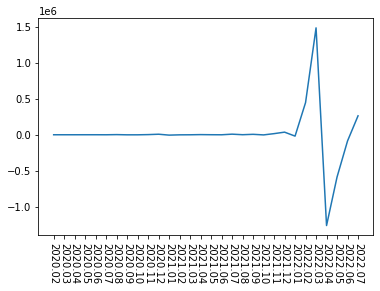

In [133]:
import matplotlib.pyplot as plt

plt.plot(target)
plt.xticks(rotation = 270)
plt.show()

In [145]:
import numpy as np
a=np.log(data['corona'])
a = a.replace(-np.inf, np.nan)
a = a.dropna()
data2 = pd.DataFrame({'export' : export_2020+export_2021+export_2022, 'corona' : a},index = date_2020+date_2021+date_2022)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [147]:
data2.head()
data2.fillna(0)

,export,corona
2020.01,4310.306086,0.000000
2020.02,4091.181880,0.000000
2020.03,4616.720385,0.000000
2020.04,3627.018284,1.945910
2020.05,3485.451140,5.429346
2020.06,3921.407063,6.111467
2020.07,4278.514405,5.662960
2020.08,3946.923058,7.726213
2020.09,4781.994752,7.261225
2020.10,4481.853443,6.577861


In [141]:
target = a.copy()
integ_result = pd.Series(stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
Y3_integ_order = 0
if integ_result[1] < 0.05:
    Y3_integ_order = Y3_integ_order + 1
print(integ_result[:])
print('Y3_order: ', Y3_integ_order,'   ','1이면 정상시계열이고 0이면 정상시계열이 아니다')

Test Statistics      -1.518799
p-value               0.524192
Used Lag              2.000000
Used Observations    25.000000
dtype: float64
Y3_order:  0     1이면 정상시계열이고 0이면 정상시계열이 아니다


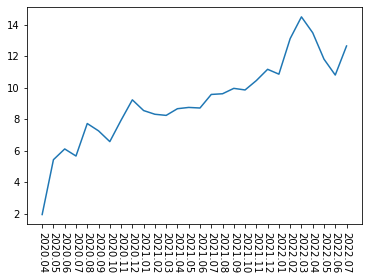

In [142]:
plt.plot(target)
plt.xticks(rotation = 270)
plt.show()

In [136]:
b = a.diff(1)
b = b.dropna()
target = b.copy()
integ_result = pd.Series(stattools.adfuller(target)[0:4], 
                         index=['Test Statistics', 'p-value', 'Used Lag', 'Used Observations'])
Y3_integ_order = 0
if integ_result[1] < 0.05:
    Y3_integ_order = Y3_integ_order + 1
print(integ_result[:])
print('Y3_order: ', Y3_integ_order,'   ','1이면 정상시계열이고 0이면 정상시계열이 아니다')

Test Statistics      -2.339483
p-value               0.159550
Used Lag              6.000000
Used Observations    20.000000
dtype: float64
Y3_order:  0     1이면 정상시계열이고 0이면 정상시계열이 아니다


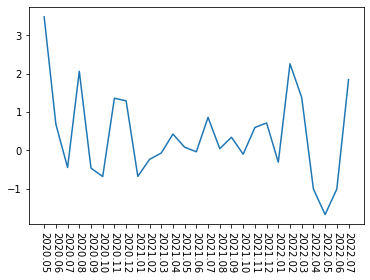

In [137]:
plt.plot(target)
plt.xticks(rotation = 270)
plt.show()

추가확진은 이미 차분되어진 데이터이기 때문에 정상성 시계열 그래프를 만들기 위해서 로그를 취해주었지만 p value 가 0.15 이상이어서 정상성을 가진다고 할 수 없었다. <br>
Corona가 무역 수출에 영향을 준것으로 나타났지만 log corona 데이터가 정상성을 만족한다고 할 수 없기 때문에 오해석할 여지가 크다.

In [148]:
print('export -> corona') 
granger_result1 = stattools.grangercausalitytests(data.dropna().iloc[:,[0,1]], maxlag=7, verbose=True)
print('corona -> export')
data2 = pd.merge(data['export'],data['corona'].diff(1), on = data.index)
granger_result2 = stattools.grangercausalitytests(data2.dropna().iloc[:,[1,0]].values, maxlag=2, verbose=True)

export -> corona

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0105  , p=0.9190  , df_denom=27, df_num=1
ssr based chi2 test:   chi2=0.0117  , p=0.9138  , df=1
likelihood ratio test: chi2=0.0117  , p=0.9138  , df=1
parameter F test:         F=0.0105  , p=0.9190  , df_denom=27, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0222  , p=0.9781  , df_denom=24, df_num=2
ssr based chi2 test:   chi2=0.0536  , p=0.9736  , df=2
likelihood ratio test: chi2=0.0535  , p=0.9736  , df=2
parameter F test:         F=0.0222  , p=0.9781  , df_denom=24, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5010  , p=0.6857  , df_denom=21, df_num=3
ssr based chi2 test:   chi2=2.0040  , p=0.5716  , df=3
likelihood ratio test: chi2=1.9355  , p=0.5859  , df=3
parameter F test:         F=0.5010  , p=0.6857  , df_denom=21, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7957  ,